In [1]:
# -------------------------------------------------
# Electric Vehicle Sales in India Project 
# By: Amit Khotele
# -------------------------------------------------

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("EVsales.csv")
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [4]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample Data:\n", df.head())

Dataset Shape: (96845, 8)

Columns: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

Sample Data:
      Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [5]:
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [7]:
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [8]:
# Calculate year-wise growth rate on state
df['Prev_Year_Sales'] = df.groupby(['State','Vehicle_Type'])['EV_Sales_Quantity'].shift(12)
df['YoY_Growth'] = ((df['EV_Sales_Quantity'] - df['Prev_Year_Sales']) / 
                     df['Prev_Year_Sales']) * 100

In [9]:
# Market share per year
yearly_sales = df.groupby(['Year','State'])['EV_Sales_Quantity'].transform('sum')
df['Market_Share_%'] = (df['EV_Sales_Quantity'] / yearly_sales) * 100

In [10]:
print("\nFinal Columns:", df.columns.tolist())
print("\nSample after cleaning:\n", df.head())


Final Columns: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity', 'Month', 'Quarter', 'Prev_Year_Sales', 'YoY_Growth', 'Market_Share_%']

Sample after cleaning:
    Year Month_Name       Date           State         Vehicle_Class  \
0  2014        jan 2014-01-01  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan 2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan 2014-01-01  Andhra Pradesh             AMBULANCE   
3  2014        jan 2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014        jan 2014-01-01  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  Month  Quarter  \
0           Others       Others                0.0      1        1   
1           Others       Others                0.0      1        1   
2           Others       Others                0.0      1        1   
3           Others       Others                0.0      1        1 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("ggplot")

In [12]:
# 1. EV Sales Trend
yearly_sales = df.groupby("Year")["EV_Sales_Quantity"].sum().reset_index()

fig1 = px.line(yearly_sales, x="Year", y="EV_Sales_Quantity",title="EV Sales Trend (2014–2024)", markers=True)
fig1.show()

C:\Users\amitk\AppData\Local\Temp\ipykernel_14324\658213354.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




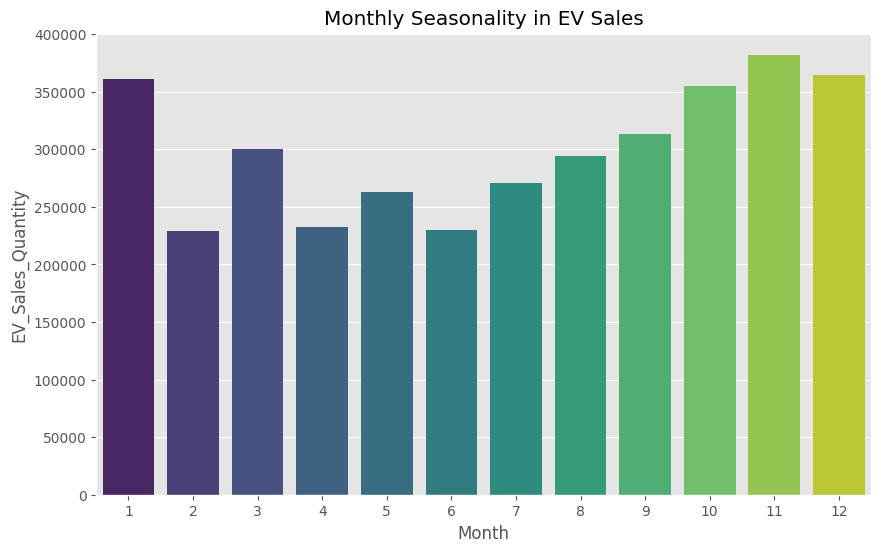

In [13]:
# 2. Monthly Seasonality
monthly_sales = df.groupby("Month")["EV_Sales_Quantity"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_sales, x="Month", y="EV_Sales_Quantity", palette="viridis")
plt.title("Monthly Seasonality in EV Sales")
plt.show()

C:\Users\amitk\AppData\Local\Temp\ipykernel_14324\2613497995.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




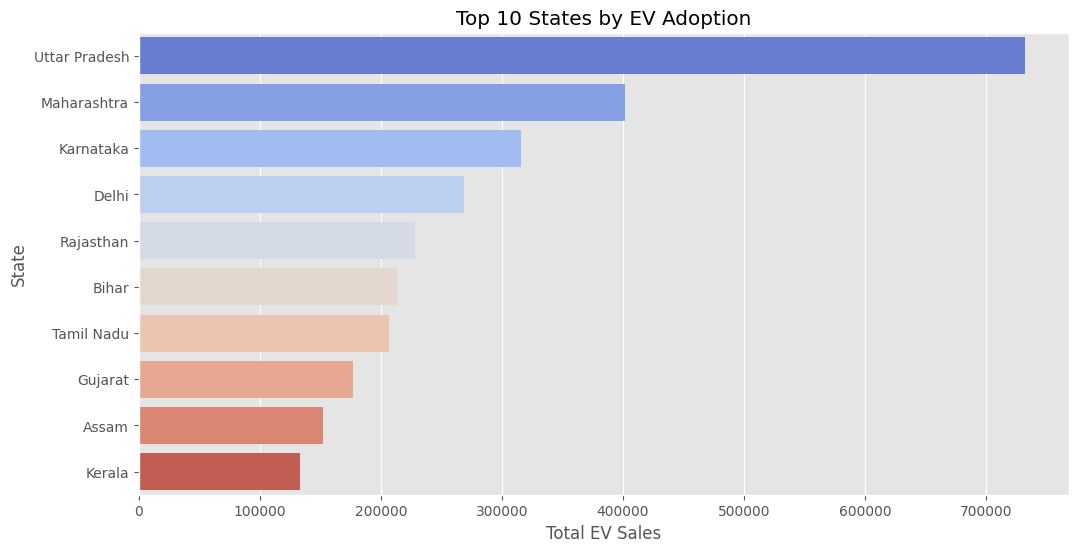

In [14]:
# 3. Top 10 States by EV Sales
state_sales = df.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="coolwarm")
plt.title("Top 10 States by EV Adoption")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.show()

C:\Users\amitk\AppData\Local\Temp\ipykernel_14324\1826636850.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




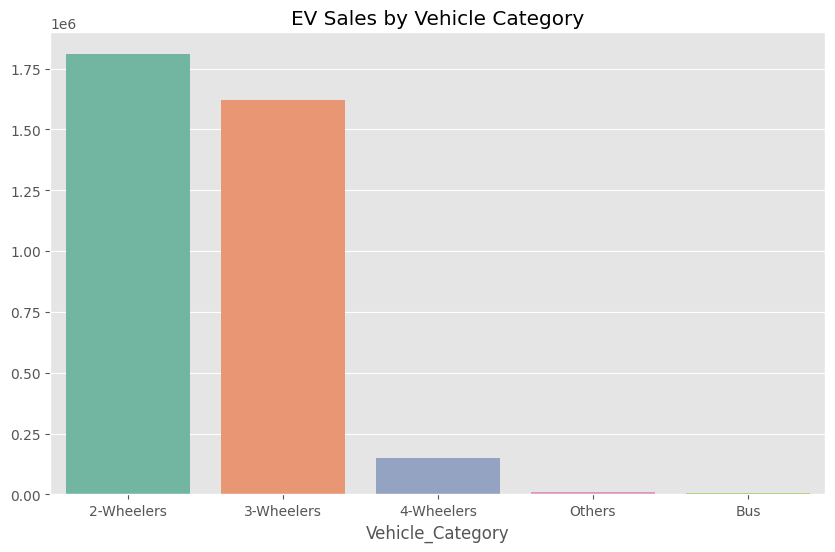

In [15]:
# 4. EV Sales by Vehicle Category
vehicle_cat_sales = df.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=vehicle_cat_sales.index, y=vehicle_cat_sales.values, palette="Set2")
plt.title("EV Sales by Vehicle Category")
plt.show()


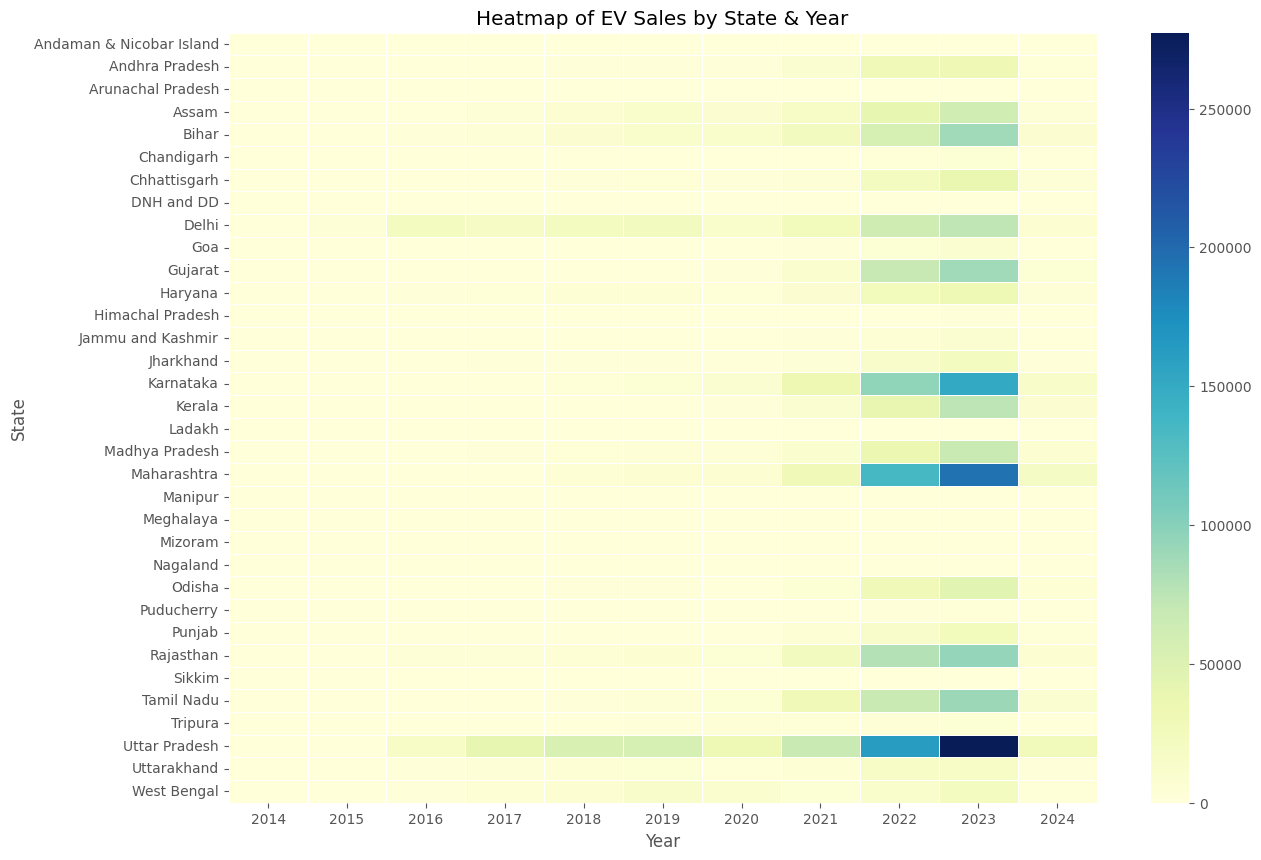

In [16]:
# 5. Heatmap: State vs Year EV Sales
pivot = df.pivot_table(index="State", columns="Year", values="EV_Sales_Quantity", aggfunc="sum", fill_value=0)

plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of EV Sales by State & Year")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score